In [1]:
import re 
import tensorflow as tf 
tf.random.set_seed(0) 

with open('wiki_space_tokenizer.txt', mode='r', encoding='utf-8') as f: 
    wiki_contents = f.read()
wiki_contents = wiki_contents.split("\n")

In [2]:
len(wiki_contents)

1806748

In [3]:
wiki_contents = wiki_contents[:1000]

In [4]:
text = list() 
maxlen = 3
tmp_content = list()
for content in wiki_contents: 
    content = content.strip()
    content = re.sub(r'\([^)]*\)', '', content)
    content = content.lower()
    if not content: continue 
    if content[-1] == '.':
        word_list = list() 
        for word in content.split(): 
            tmp_idx = 0
            for idx, char in enumerate(word): 
                if char in "\'\",.<>-•·": 
                    if idx == 0: word_list.append(word[idx])
                    elif tmp_idx < idx: 
                        word_list.append(word[tmp_idx:idx])
                        word_list.append(word[idx])
                    tmp_idx = idx+1 
            if tmp_idx == 0: word_list.append(word) 
            elif tmp_idx < len(word): word_list.append(word[tmp_idx:])
                
        if len(tmp_content) > 0: 
            tmp_content = tmp_content + ['\n'] + word_list
        else: tmp_content = word_list 
    else:
        if len(tmp_content) > maxlen: 
            text.append(tmp_content+['E']) 
        tmp_content = list()    

In [5]:
len(text), text[:2]

(111,
 [['제임스',
   '얼',
   '"',
   '지미',
   '"',
   '카터',
   '주니어는',
   '민주당',
   '출신',
   '미국',
   '39번째',
   '대통령이다',
   '.',
   '\n',
   '지미',
   '카터는',
   '조지아',
   '주',
   '섬터',
   '카운티',
   '플레인스',
   '마을에서',
   '태어났다',
   '.',
   '조지아',
   '공과대학교를',
   '졸업하였다',
   '.',
   '그',
   '후',
   '해군에',
   '들어가',
   '전함',
   '·',
   '원자력',
   '·',
   '잠수함의',
   '승무원으로',
   '일하였다',
   '.',
   '1953년',
   '미국',
   '해군',
   '대위로',
   '예편하였고',
   '이후',
   '땅콩',
   '·',
   '면화',
   '등을',
   '가꿔',
   '많은',
   '돈을',
   '벌었다',
   '.',
   '그의',
   '별명이',
   '"',
   '땅콩',
   '농부',
   '"',
   '로',
   '알려졌다',
   '.',
   '\n',
   '1962년',
   '조지아',
   '주',
   '상원',
   '의원',
   '선거에서',
   '낙선하나',
   '그',
   '선거가',
   '부정선거',
   '였음을',
   '입증하게',
   '되어',
   '당선되고',
   ',',
   '1966년',
   '조지아',
   '주',
   '지사',
   '선거에',
   '낙선하지만',
   '1970년',
   '조지아',
   '주',
   '지사를',
   '역임했다',
   '.',
   '대통령이',
   '되기',
   '전',
   '조지아',
   '주',
   '상원의원을',
   '두번',
   '연임했으며',
   ',',
   '1971년부터',
   '1975년까지

In [6]:
total_text = list() 
for elem in text: total_text += elem
len(total_text)

38709

In [7]:
words = sorted(list(set(total_text)))
word_size = len(words)
word_indices = dict((c, i) for i, c in enumerate(words))
indices_word = dict((i, c) for i, c in enumerate(words))
print('total words: ', word_size)

total words:  16324


In [8]:
sentences = []
next_words = []
for content in text: 
    for i in range(0, len(content) - maxlen, 1):
        sentences.append([word_indices[elem] for elem in content[i: i + maxlen]])
        next_words.append(word_indices[content[i + maxlen]])
print("sequences length: ", len(sentences))

sequences length:  38376


In [9]:
from tensorflow.keras.utils import to_categorical 
import numpy as np
data_X = np.array(sentences) 
data_Y = np.array(next_words) 
data_Y = to_categorical(data_Y)
y_size = data_Y.shape[1]

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=word_size, 
                   output_dim=200, 
                   input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(y_size, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
import time 
start_time = time.time() 

history = model.fit(data_X, data_Y,
          batch_size=256,
          epochs=70, 
          verbose=2)

end_time = time.time()

Train on 38376 samples
Epoch 1/70
38376/38376 - 11s - loss: 9.2170 - accuracy: 0.0643
Epoch 2/70
38376/38376 - 8s - loss: 8.2752 - accuracy: 0.0616
Epoch 3/70
38376/38376 - 8s - loss: 7.9728 - accuracy: 0.0822
Epoch 4/70
38376/38376 - 8s - loss: 7.7711 - accuracy: 0.0939
Epoch 5/70
38376/38376 - 8s - loss: 7.6218 - accuracy: 0.1054
Epoch 6/70
38376/38376 - 8s - loss: 7.4914 - accuracy: 0.1135
Epoch 7/70
38376/38376 - 8s - loss: 7.3614 - accuracy: 0.1177
Epoch 8/70
38376/38376 - 8s - loss: 7.2237 - accuracy: 0.1251
Epoch 9/70
38376/38376 - 8s - loss: 7.0819 - accuracy: 0.1291
Epoch 10/70
38376/38376 - 8s - loss: 6.9356 - accuracy: 0.1350
Epoch 11/70
38376/38376 - 8s - loss: 6.7815 - accuracy: 0.1387
Epoch 12/70
38376/38376 - 8s - loss: 6.6218 - accuracy: 0.1434
Epoch 13/70
38376/38376 - 8s - loss: 6.4580 - accuracy: 0.1475
Epoch 14/70
38376/38376 - 8s - loss: 6.2930 - accuracy: 0.1513
Epoch 15/70
38376/38376 - 8s - loss: 6.1250 - accuracy: 0.1568
Epoch 16/70
38376/38376 - 8s - loss: 5.9

In [13]:
"Time: {}".format(end_time-start_time)

'Time: 576.9808080196381'

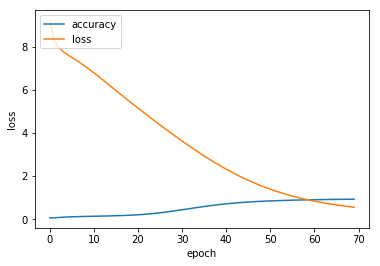

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [15]:
import sys
from nltk.translate import bleu_score

def text_generation(model):
    text_idx = 0
    current_text = text[text_idx]
    sentence = current_text[:maxlen]
    generated = ' '.join(sentence)
    print('----- Generating with seed: "' + generated + '"')
    sys.stdout.write(generated)

    for i in range(200): 
        x_pred = list()
        for word in sentence: 
            x_pred.append([word_indices[word]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_word = indices_word[next_idx]
        sentence = sentence[1:] + [next_word]
        sys.stdout.write(' ' + next_word)
        sys.stdout.flush()
        if next_word == 'E': break 
    print()

def text_generation_res(model):
    text_idx = 0
    current_text = text[text_idx]
    generated = ''
    sentence = current_text[:maxlen]
    generated += ' '.join(sentence)
    
    for i in range(min(200, len(current_text))): 
        x_pred = list()
        for word in sentence: 
            x_pred.append([word_indices[word]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_word = indices_word[next_idx]
        sentence = sentence[1:] + [next_word]
        generated = generated + ' ' + next_word
        if next_word == 'E': break
        
    return generated, text_idx

def get_BLEU_score(model): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    original_text = text[text_idx] 
    original_text = original_text[:pred_len]
    BLEUscore = bleu_score.sentence_bleu([' '.join(original_text)], predict_text)
    return BLEUscore

In [16]:
text_generation(model)

----- Generating with seed: "제임스 얼 ""
제임스 얼 " 지미 " 카터 주니어는 민주당 출신 미국 39번째 대통령이다 . 
 지미 카터는 대한민국과의 관계에서도 중요한 영향을 미쳤던 대통령 중 하나다 . 인권 문제와 주한미군 철수 문제로 한때 한미 관계가 불편하기도 했다 . 1978년 대한민국에 대한 조선민주주의인민공화국의 위협에 대비해 한미연합사를 창설하면서 , 1982년까지 3단계에 걸쳐 주한미군을 철수하기로 했다 . 그러나 주한미군사령부와 정보기관 · 의회의 반대에 부딪혀 주한미군은 완전철수 대신 6 , 000명을 감축하는 데 그쳤다 . 또한 박정희 정권의 인권 문제 등과의 논란으로 불협화음을 냈으나 , 1979년 6월 하순 , 대한민국을 방문하여 관계가 다소 회복되었다 . 
 1979년 ~ 1980년 대한민국의 정치적 격변기 당시의 대통령이었던 그는 이에 대해 애매한 태도를 보였고 , 이는 후에 대한민국 내에서 고조되는 반미 운동의 한 원인이 됐다 . 10월 26일 , 박정희 전 대통령이었다 . 또한 " 15억 원이나 관리하면서 박연차로부터 노무현이 3억 원이나 빌릴 때에도 그 돈을 내놓지 않고 차명 계좌에 은닉하고 있었다는 것을 믿을 국민은 없다 " 라고 판시하였다 . 
 2009년 5월 23일 , 노무현의 자살함으로써 노무현에 대한 검찰 수사를 종료하였다 . 
 2009년 5월 23일 , 노무현의 자살함으로써 노무현에 대한 검찰 수사를 종료하였다 . 
 2009년 5월 23일 , 노무현의 자살함으로써 노무현에 대한 검찰 수사를 종료하였다 . 
 2009년 5월 23일 , 노무현의 자살함으로써 노무현에 대한 검찰 수사를 종료하였다 . 



In [17]:
get_BLEU_score(model)

0.054145498666060284

In [18]:
from rouge import Rouge

evalutaor = Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                           max_n=4,
                           apply_avg='Avg',
                           alpha=0.5, # Default F1_score
                           weight_factor=1.2)
def get_ROUGE_score(model, evaluator): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_%text) 
    predict_text = ' '.join([elem[0] for elem in predict_text])
    original_text = text[text_idx] 
    original_text = ' '.join([elem[0] for elem in original_text[:pred_len]]) 
    score = evalutaor.get_scores(original_text, predict_text)
    return score
get_ROUGE_score(model, evalutaor)

{'rouge-1': {'f': 0.3902439024390244, 'p': 0.38095238095238093, 'r': 0.4},
 'rouge-4': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-3': {'f': 0.05405405405405406,
  'p': 0.05263157894736842,
  'r': 0.05555555555555555},
 'rouge-2': {'f': 0.15384615384615385, 'p': 0.15, 'r': 0.15789473684210525},
 'rouge-l': {'f': 0.4565251580949447,
  'p': 0.44743049129966744,
  'r': 0.4659972203002852},
 'rouge-w': {'f': 0.21685693894947203,
  'p': 0.2859632609331056,
  'r': 0.17465060484356942}}